In [4]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image
from IPython.display import display, Math, Latex
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import requests
from tabulate import tabulate
with MPRester("Jqka7RaOKJvTC6iABC") as me:    
    
    # Structure for material id
    pars = CifParser("mp9368.cif")
    struct = pars.get_structures()[0]
    spg = SpacegroupAnalyzer(struct)
    
    # Calcul des 3 premiers pics de diffraction
    print("Cette tâche cherche à déterminer les 3 premiers pics du diffractogramme correspondant au RbTMS2, pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 ̊A. Analytiquement, on peut trouver la position des pics de diffraction à l’aide de la loi de Bragg:")

Cette tâche cherche à déterminer les 3 premiers pics du diffractogramme correspondant au RbTMS2, pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 ̊A. Analytiquement, on peut trouver la position des pics de diffraction à l’aide de la loi de Bragg:


$$2*d_{hkl}\sin\theta = \lambda$$
avec 
- $\lambda$ la longueur d'onde des rayons X utilisés, c'est-à-dire $\lambda=1.54060Å$
- $d_{hkl}$, la distance inter-planaire pour la famille de plans (hkl), donnée par la formule $d_{hkl} = \frac{2\pi}{|K|}$,
avec $K$, un vecteur du réseau réciproque, tel que $K = ha_1^*+ka_2^*+la_3^*$, $h,k,l \in Z$

                Indices hkl    Distance interplanaire    Angle de diffraction    Intensité du pic
-------------  -------------  ------------------------  ----------------------  ------------------
 Premier pic     (0, 0, 1)       7.669540075200056        11.537897425881823         35.5727
Deuxième pic     (0, 0, 2)       3.834770037600028        23.194887722234224         26.5508
Troisième pic    (1, 1, 1)       3.448114990011639        25.838456602237823         7.48886
                 (1, 0, 0) 

On remarque que le 3ème pic possède deux indices de Miller (h,k,l) différents. 

On retrouve ces 3 pics sur la figure suivante :


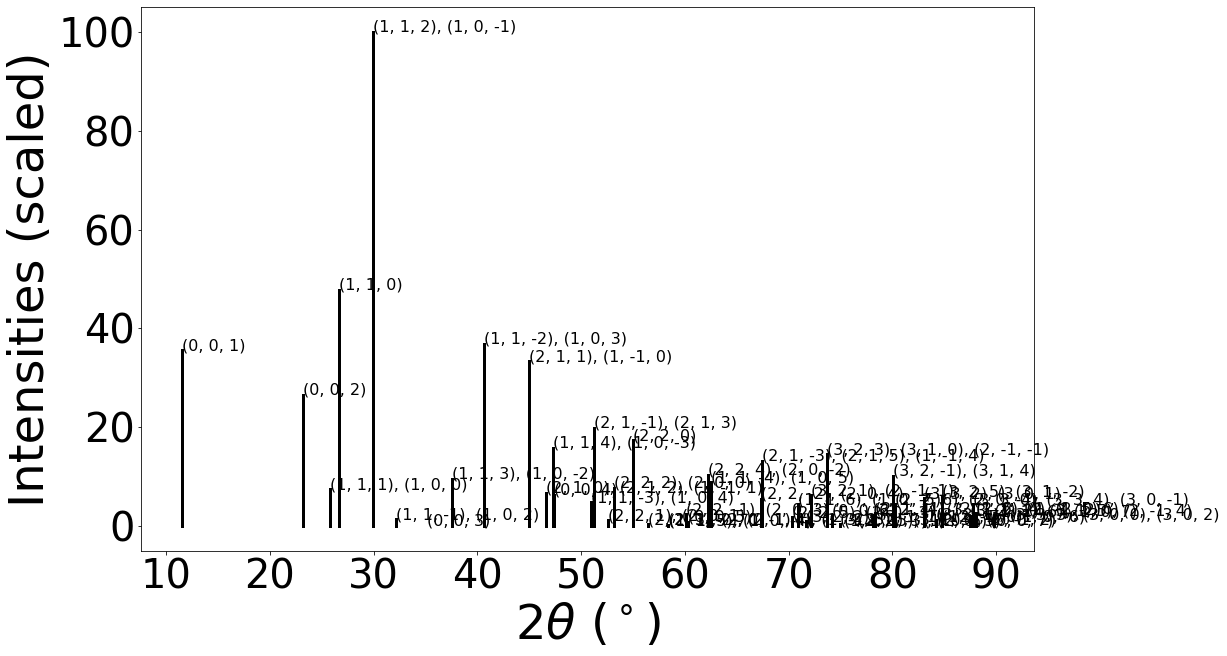

None
La figure est similaire à celle retrouvée sur Materials project :


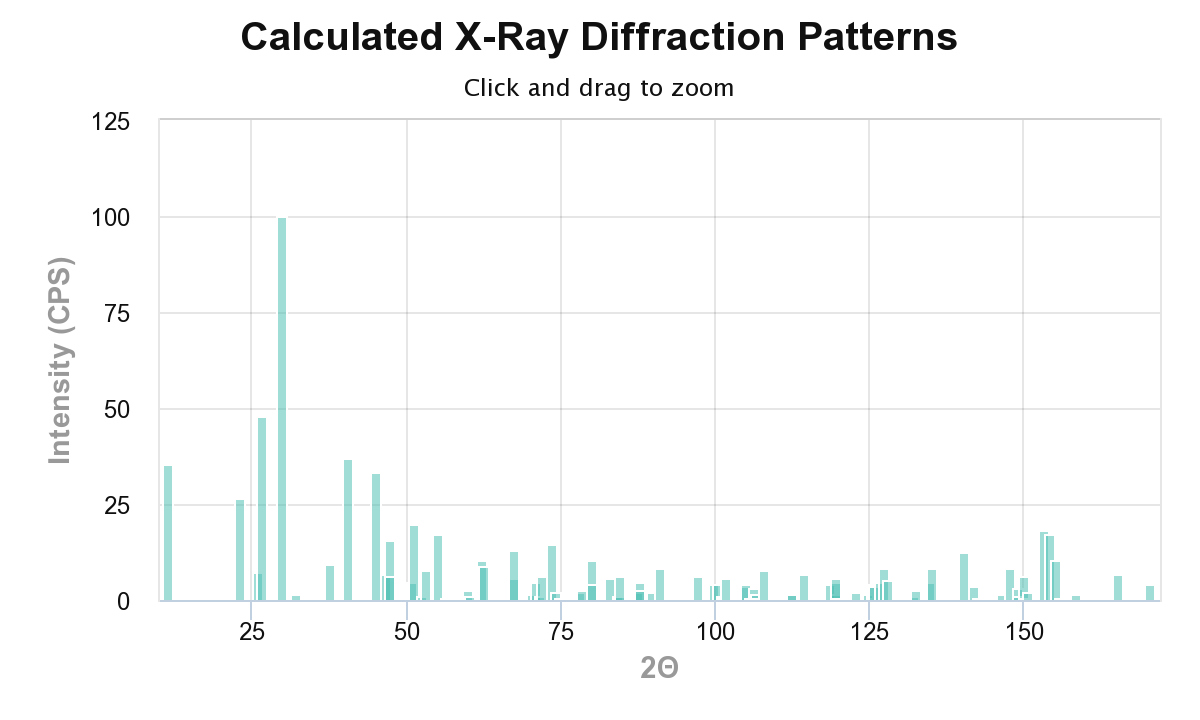

In [12]:
c = XRDCalculator(wavelength = 'CuKa', symprec = 0, debye_waller_factors = None)
sp = c.get_pattern(struct)
#3 premiers pics de diffraction
pic1 = sp.hkls[0][0]
pic2 = sp.hkls[1][0]
pic3a = sp.hkls[2][0]
pic3b = sp.hkls[2][1]
table = [["Premier pic", pic1["hkl"], sp.d_hkls[0], sp.x[0], sp.y[0]],
         ["Deuxième pic", pic2["hkl"], sp.d_hkls[1], sp.x[1], sp.y[1]],
         ["Troisième pic", pic3a["hkl"], sp.d_hkls[2], sp.x[2], sp.y[2]],
         ["", pic3b["hkl"],"","",]
        ]
print(tabulate(table, headers=["","Indices hkl", "Distance interplanaire", "Angle de diffraction", "Intensité du pic"], 
               stralign="center", numalign="center"),"\n")
print("On remarque que le 3ème pic possède deux indices de Miller (h,k,l) différents.", "\n")
# Graphe des pics de diffraction
diff = Image(filename='xray_diff_pattern.png')
print("On retrouve ces 3 pics sur la figure suivante :")
print(c.show_plot(struct))
print("La figure est similaire à celle retrouvée sur Materials project :")
display(diff)